In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Get Count of Each Jargon Term in Each Document

In [2]:
jargon = pd.read_csv('../data/jargon.csv')
jargon.head()

,jargon_term
0,A/B testing
1,accuracy
2,action
3,activation function
4,active learning


In [3]:
tds = pd.read_csv('../data/nlp_nltk_nostem_preproc_strings.csv').drop(columns='Unnamed: 0')
tds.head()

,claps,text
0,489,ultimate guide acing coding interviews data sc...
1,139,shakespeare versus eminem— who’s better lyrici...
2,133,implementing visualttransformer pytorch hi guy...
3,92,stock price analysis pandas altair practical g...
4,58,optimal threshold imbalanced classification ha...


In [4]:
tds.index

RangeIndex(start=0, stop=9290, step=1)

In [5]:
# create a list to store the individual document dictionaries 
jargon_count_list = []

# iterate through each document
for document in tds['text']:
    
    #create dictionary for each document to store the counts for each term
    doc_dict = {}

    #set up a counter variable to keep track of the total uses of all jargon terms
    total_jargon_count = 0  
    
    #iterate through the list of jargon terms
    for term in jargon['jargon_term']:
    
        #set up a counter for each individual jargon term 
        term_count = 0
        
        #count the number of times each indivivdual jargon term shows up in the document & store it 
        term_count = document.count(term)
        
        #store the term count in the individual document's dictionary
        doc_dict[term] = term_count
        
        #increment the total jargon count by this term's count
        total_jargon_count += term_count
        
        
    #add the document's total jargon count to the dictionary
    doc_dict['total_jargon_count'] = total_jargon_count
    
    #store the dictionary in the list 
    jargon_count_list.append(doc_dict)
        



In [6]:
results = pd.DataFrame(jargon_count_list)
df = pd.concat([tds, results], axis=1)

In [7]:
df.head(20)

,claps,text,A/B testing,accuracy,action,activation function,active learning,AdaGrad,agent,agglomerative clustering,...,user matrix,validation,validation set,vanishing gradient problem,Wasserstein loss,weight,Weighted Alternating Least Squares (WALS),wide model,width,total_jargon_count
0,489,ultimate guide acing coding interviews data sc...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
1,139,shakespeare versus eminem— who’s better lyrici...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,8
2,133,implementing visualttransformer pytorch hi guy...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42
3,92,stock price analysis pandas altair practical g...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
4,58,optimal threshold imbalanced classification ha...,0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,145
5,107,creating abstract art stylegan2 ada used adapt...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,98
6,24,natural language generation part 2: gpt2 huggi...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,82
7,155,underspecification: dangerously underdiscussed...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2,0,0,0,84
8,36,project: modeling & predicting churning custom...,0,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,70
9,234,15 lesserknown useful sklearn models use inter...,0,1,0,0,0,0,0,0,...,0,1,0,0,0,5,0,0,0,277


In [8]:
df['claps'].corr(df['total_jargon_count'])

0.019261053624778233

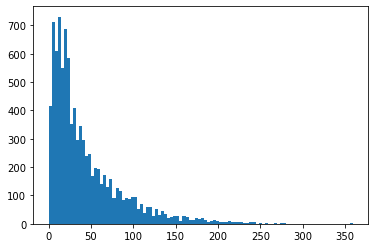

In [9]:
plt.hist(df['total_jargon_count'], bins = 100);

In [10]:
df['log_claps'] = np.log(df['claps'])

/Users/rachelinsler/ENTER/envs/capstone/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
df = df[np.isfinite(df['log_claps'])]

In [12]:
df['log_claps'].corr(df['total_jargon_count'])

0.04772737750896547

In [13]:
df['log_jargon_count'] = np.log(df['total_jargon_count'])

In [14]:
df = df[np.isfinite(df['log_jargon_count'])]


In [15]:
df['log_claps'].corr(df['log_jargon_count'])

0.06774449353579508

In [16]:
df.head()

,claps,text,A/B testing,accuracy,action,activation function,active learning,AdaGrad,agent,agglomerative clustering,...,validation set,vanishing gradient problem,Wasserstein loss,weight,Weighted Alternating Least Squares (WALS),wide model,width,total_jargon_count,log_claps,log_jargon_count
0,489,ultimate guide acing coding interviews data sc...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,20,6.192362,2.995732
1,139,shakespeare versus eminem— who’s better lyrici...,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,8,4.934474,2.079442
2,133,implementing visualttransformer pytorch hi guy...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,42,4.890349,3.737670
3,92,stock price analysis pandas altair practical g...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,19,4.521789,2.944439
4,58,optimal threshold imbalanced classification ha...,0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,145,4.060443,4.976734


In [17]:
outlier_columns = ['log_claps', 'log_jargon_count']
for col in outlier_columns:
    df = df[(df[col] <= ((df[col].mean())+(3*(df[col].std()))))]

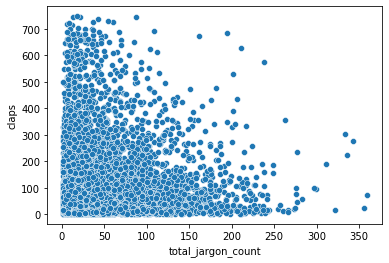

In [18]:
#scatterplot

sns.scatterplot(data = df,x='total_jargon_count', y='claps');

In [19]:
df.to_csv('../data/tds_vectorized_jargon.csv', index=False)